In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", round(precision,2))
    print("Recall: ", round(recall,2))
    print("F-score: ", round(Fscore,2))
    print("Accuracy: ", round(accuracy,2))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
url = '/content/drive/MyDrive/AIDatasets/Detecting-Depression-in-Tweets-master/sentiment_tweets3.csv'
dataset = pd.read_csv(url)

In [6]:
# Dropping column "unnamed"
dataset = dataset.drop('Unnamed: 0',axis=1)

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
corpus = []
for i in range(0,10314):
    tweet = dataset['message'][i]
    tweet = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', ' ', tweet) # remove urls
    tweet = re.sub(r'#', '', tweet) # remove hashtag symbol
    tweet = re.sub(r'<([^>]*)>', ' ', tweet) # remove emojis
    tweet = re.sub('[^a-zA-Z]',' ', tweet) 
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [9]:
# Creating dataframe of cleaned data
df = pd.DataFrame({'message':corpus, 'label':dataset['label']})
df.head(),df.tail()

(                                             message  label
 0                 real good moment missssssssss much      0
 1                                         read manga      0
 2                                       comeagainjen      0
 3  lapcat need send em account tomorrow oddli eve...      0
 4                    add myspac myspac com lookthund      0,
                                                  message  label
 10309      depress g herbo mood done stress peopl deserv      1
 10310  depress succumb brain make feel like never enough      1
 10311  ketamin nasal spray show promis depress suicid...      1
 10312             dont mistak bad day depress everyon em      1
 10313                                                         1)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [11]:
cv = CountVectorizer(max_features=400) #18153
X = cv.fit_transform(corpus).toarray()
y = dataset['label']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0) 

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## MAX VOTING

In [14]:
model1 = GaussianNB()
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model3 = KNeighborsClassifier(n_neighbors = 32, metric = 'minkowski', p = 2)                        #select optimum n_neghbors and p?
model = VotingClassifier(estimators=[('gnb', model1), ('dt', model2),('knn',model3)], voting='hard')
# model.fit(X_train,y_train)
# model.score(X_test,y_test) #alt to the v cell

In [15]:
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm_max_vot = confusion_matrix(y_test, y_pred)

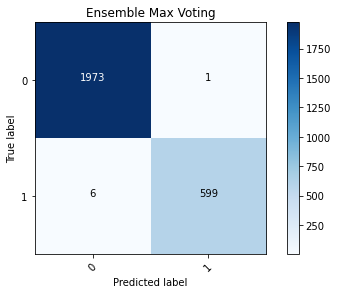

In [17]:
plot_confusion_matrix(cm_max_vot,[0,1],title='Ensemble Max Voting')

In [20]:
metrics(list(y_test),list(y_pred))

Precision:  1.0
Recall:  0.99
F-score:  0.99
Accuracy:  1.0
